# Palmer Penguins
The Palmer Penguins dataset contains the data that were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Let us explore the dataset and see if we could find anything by performing an analysis over the dataset.

In [72]:
library(tidyverse)

In [73]:
library(palmerpenguins)
data(penguins)

Let us now study the attributes of the penguins

In [53]:
colnames(penguins)

[1] "species"           "island"            "bill_length_mm"   
[4] "bill_depth_mm"     "flipper_length_mm" "body_mass_g"      
[7] "sex"               "year"

In [54]:
summary(penguins)

      species          island    bill_length_mm  bill_depth_mm  
 Adelie   :152   Biscoe   :168   Min.   :32.10   Min.   :13.10  
 Chinstrap: 68   Dream    :124   1st Qu.:39.23   1st Qu.:15.60  
 Gentoo   :124   Torgersen: 52   Median :44.45   Median :17.30  
                                 Mean   :43.92   Mean   :17.15  
                                 3rd Qu.:48.50   3rd Qu.:18.70  
                                 Max.   :59.60   Max.   :21.50  
                                 NA's   :2       NA's   :2      
 flipper_length_mm  body_mass_g       sex           year     
 Min.   :172.0     Min.   :2700   female:165   Min.   :2007  
 1st Qu.:190.0     1st Qu.:3550   male  :168   1st Qu.:2007  
 Median :197.0     Median :4050   NA's  : 11   Median :2008  
 Mean   :200.9     Mean   :4202                Mean   :2008  
 3rd Qu.:213.0     3rd Qu.:4750                3rd Qu.:2009  
 Max.   :231.0     Max.   :6300                Max.   :2009  
 NA's   :2         NA's   :2                  

In [55]:
str(penguins)

tibble [344 × 8] (S3: tbl_df/tbl/data.frame)
 $ species          : Factor w/ 3 levels "Adelie","Chinstrap",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ island           : Factor w/ 3 levels "Biscoe","Dream",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ bill_length_mm   : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ bill_depth_mm    : num [1:344] 18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int [1:344] 181 186 195 NA 193 190 181 195 193 190 ...
 $ body_mass_g      : int [1:344] 3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : Factor w/ 2 levels "female","male": 2 1 1 NA 1 2 1 2 NA NA ...
 $ year             : int [1:344] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...


In [56]:
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


# **Univariate Analysis**

## Body Mass of Penguins


In [57]:
penguin <- penguins %>% mutate(bodymass_kg = body_mass_g/1000)
head(penguin)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bodymass_kg
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007,3.75
Adelie,Torgersen,39.5,17.4,186,3800,female,2007,3.80
Adelie,Torgersen,40.3,18.0,195,3250,female,2007,3.25
Adelie,Torgersen,NA,NA,NA,NA,NA,2007,NA
Adelie,Torgersen,36.7,19.3,193,3450,female,2007,3.45
Adelie,Torgersen,39.3,20.6,190,3650,male,2007,3.65


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite values (`stat_bin()`).”


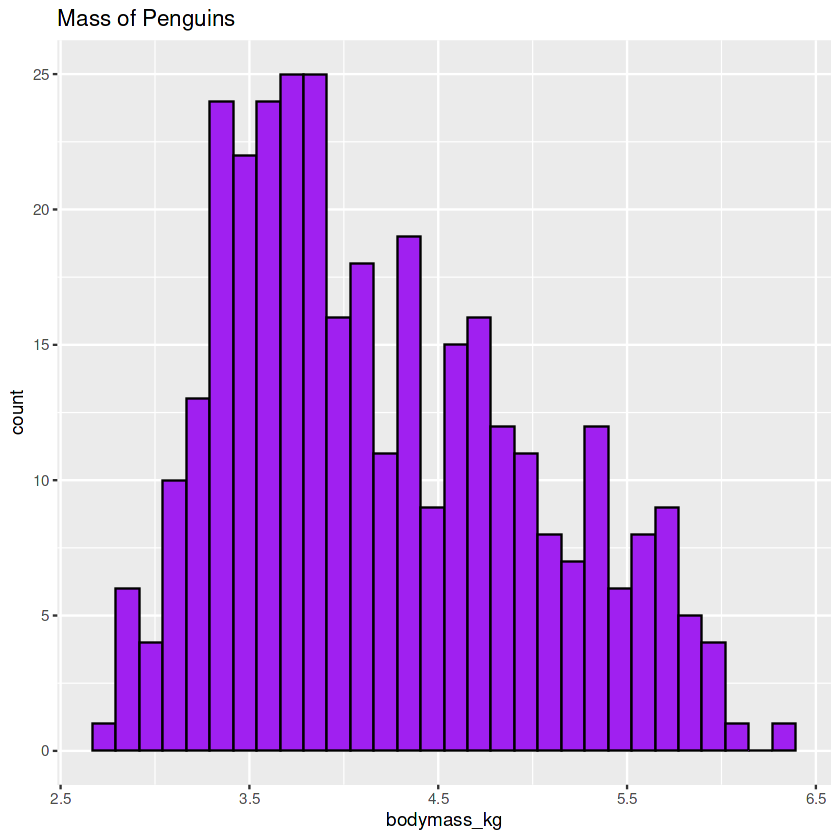

In [58]:
ggplot(penguin) +
geom_histogram(mapping = aes(x= bodymass_kg),
         color="black",
         fill="purple")+
   labs(title="Mass of Penguins")

In [59]:
penguin %>% 
drop_na() %>% 
summarize(median_mass = median(bodymass_kg))

median_mass
<dbl>
4.05


In [84]:
penguin %>% 
drop_na() %>% 
summarize(mean_mass = mean(bodymass_kg))

mean_mass
<dbl>
4.207057


# Analysis based on Sex of Penguins

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


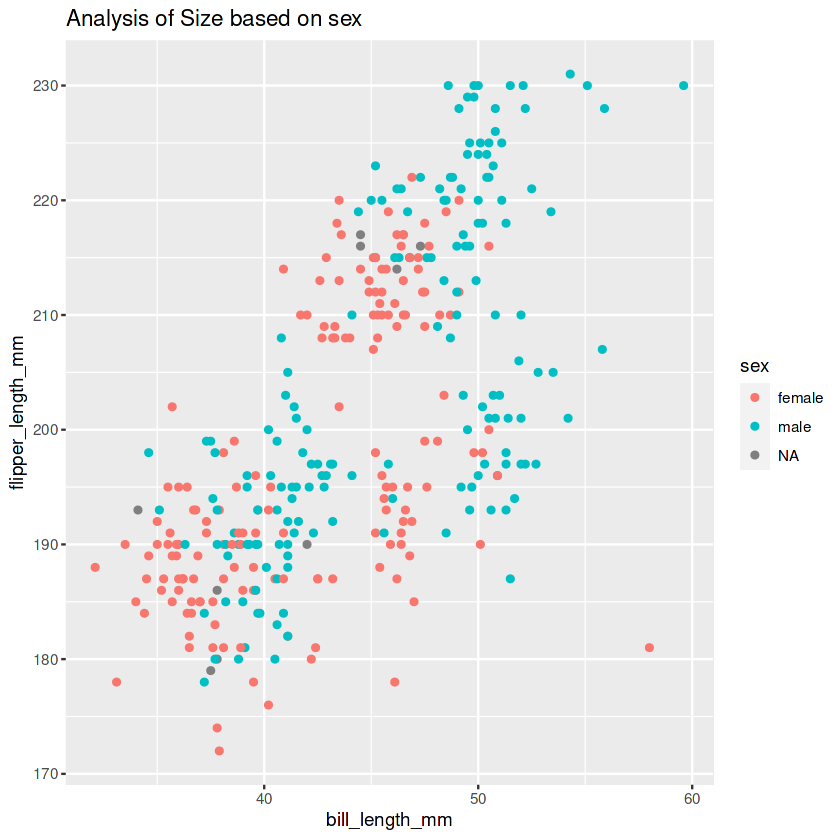

In [86]:
ggplot(data = penguins)+ geom_point(mapping = aes(x = bill_length_mm, y = flipper_length_mm, colour = sex)) + labs(title = "Analysis of Size based on sex")

We could see from the above graph that Male penguins are **larger** in size than females.

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


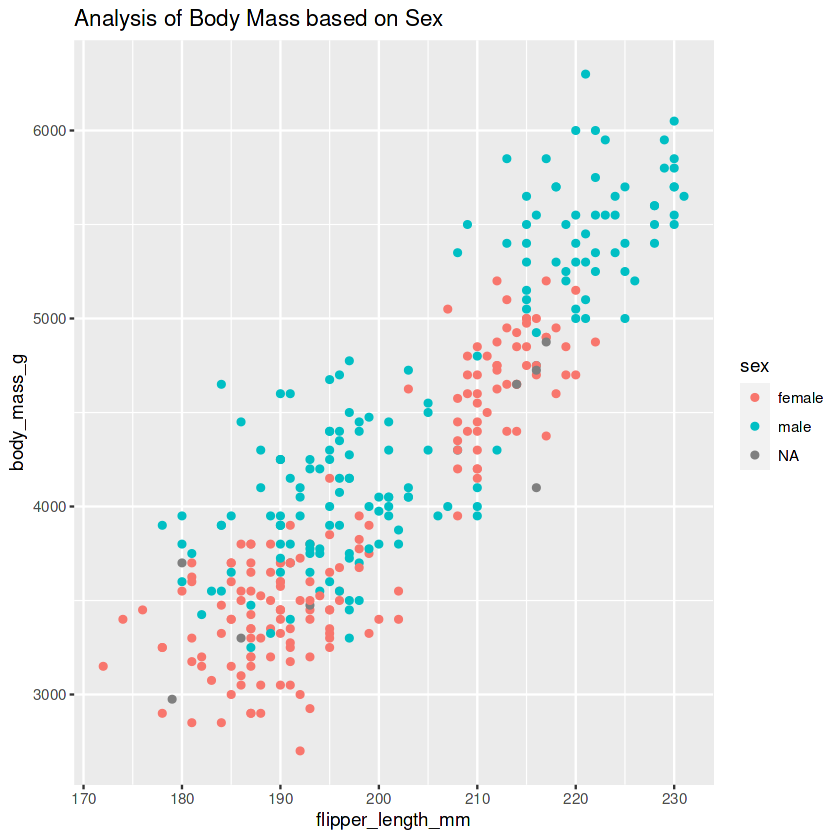

In [87]:
ggplot(data = penguins) + 
  geom_point(mapping = aes(x = flipper_length_mm, y = body_mass_g, color = sex))+
  labs(title = "Analysis of Body Mass based on Sex")

We can say from the above graph that Males are **heavier** than Females

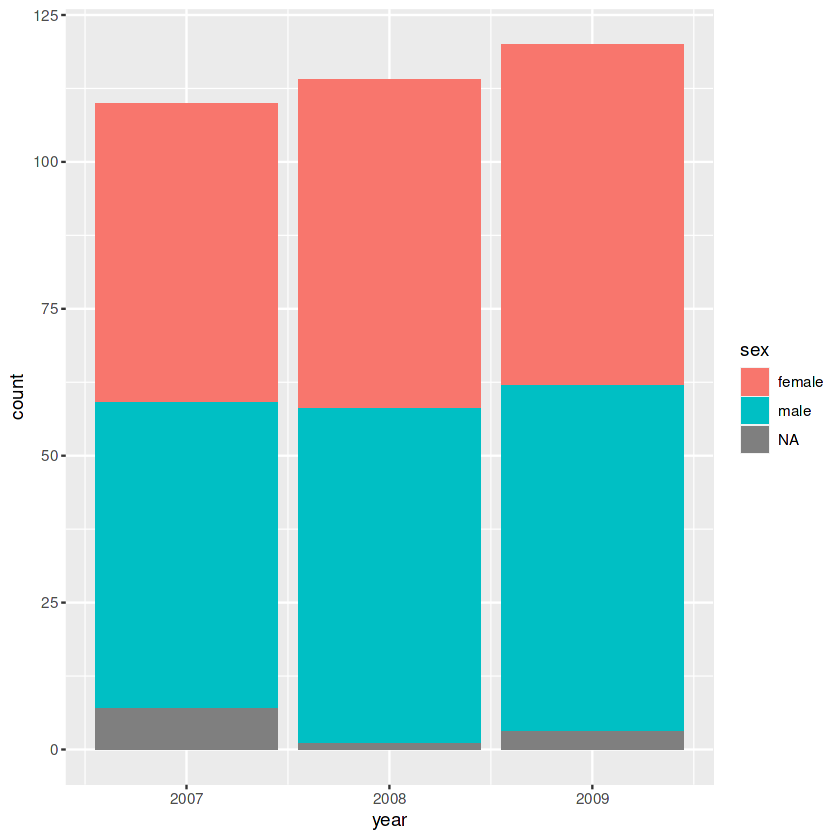

In [79]:
ggplot(data = penguins) + geom_bar(mapping = aes(x =year, fill= sex))

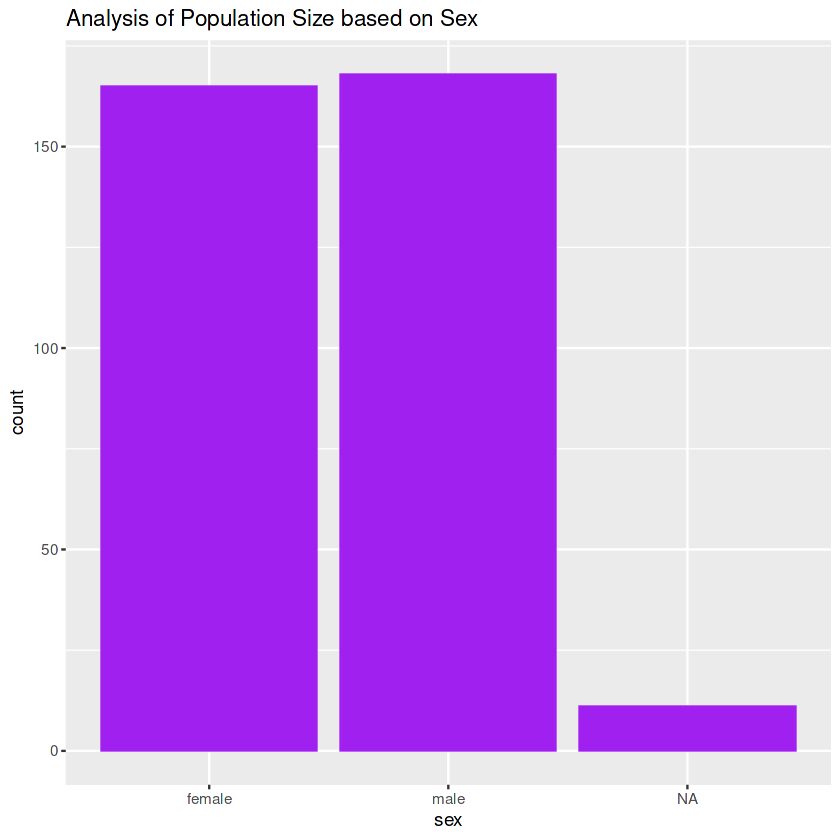

In [90]:
ggplot(data = penguins) + 
  geom_bar(mapping = aes(x = sex), color="purple", fill = "purple")+
  labs(title = "Analysis of Population Size based on Sex")

We can see that the number of male population is slightly more than the females although they are almost equal. There is not much variance in the population size among the sexes.

# Analysis based on Islands

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


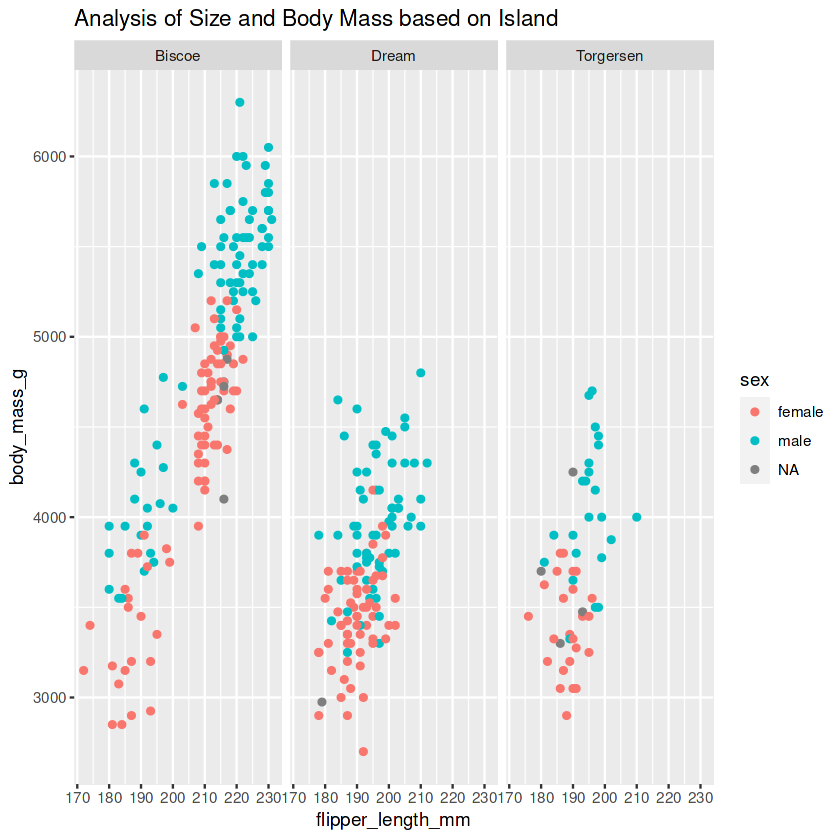

In [91]:
ggplot(data = penguins) + 
  geom_point(mapping = aes(x =flipper_length_mm, y= body_mass_g, color=sex))+
  facet_wrap(~island)+
labs(title = "Analysis of Size and Body Mass based on Island")

The penguins from the Islands of Biscoe seems to have higher body mass and flipper length than the rest or the islands.
This means Biscoe penguins are larger and heavier compared to other islands with respect to both sexes.